### Web Scraping

In [1]:
from bs4 import BeautifulSoup                    # HTML parsing
from IPython.display import Image                # image display
import os                                        # mkdir(), listdir()
import requests                                  # HTTP connection
import time                                      # sleep() function 

### Fetching HTML content from a webpage using Requests

**[What The Polls Say About Impeachment Before The First Public Hearing](https://fivethirtyeight.com/features/what-the-polls-say-about-impeachment-before-the-first-public-hearing/)**

In [2]:
url = "https://fivethirtyeight.com/features/what-weve-already-learned-from-the-democrats-impeachment-witnesses/"
r = requests.get(url)

In [3]:
r.content

b'<!DOCTYPE html>\n<html lang="en-US" class="no-js">\n<head>\n\t<meta charset="UTF-8">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t\t<title>The Democrats&#8217; Impeachment Witnesses | FiveThirtyEight</title>\n<!-- Jetpack Site Verification Tags -->\n\t\t\t\t\t<link\n\t\t\trel="preload"\n\t\t\tas="font"\n\t\t\ttype="font/woff2"\n\t\t\thref="wp-content/themes/espn-fivethirtyeight/assets/fonts/AtlasGrotesk-Bold-Web.woff2"\n\t\t\tcrossorigin="anonymous">\n\t\t\t\t\t<link\n\t\t\trel="preload"\n\t\t\tas="font"\n\t\t\ttype="font/woff2"\n\t\t\thref="wp-content/themes/espn-fivethirtyeight/assets/fonts/AtlasGrotesk-Regular-Web.woff2"\n\t\t\tcrossorigin="anonymous">\n\t\t\t\t\t<link\n\t\t\trel="preload"\n\t\t\tas="font"\n\t\t\ttype="font/woff2"\n\t\t\thref="wp-content/themes/espn-fivethirtyeight/assets/fonts/decimamonopro-webfont.woff2"\n\t\t\tcrossorigin="anonymous">\n\t\t\t\t<link rel=\'dns-prefetch\' href=\'//cdn.registerdisney.go.com\' />\n<link rel=\'dns-p

In [4]:
soup = BeautifulSoup(r.content, "html.parser")

In [5]:
soup.title

<title>The Democrats’ Impeachment Witnesses | FiveThirtyEight</title>

In [6]:
soup.title.text

'The Democrats’ Impeachment Witnesses | FiveThirtyEight'

In [7]:
soup.find(name="h1", attrs={"class": "article-title article-title-single entry-title"})

<h1 class="article-title article-title-single entry-title">
									The Democrats’ Impeachment Witnesses								</h1>

### Extracting the title of the article

In [8]:
soup.find("h1", {"class": "article-title article-title-single entry-title"}).text

'\n\t\t\t\t\t\t\t\t\tThe Democrats’ Impeachment Witnesses\t\t\t\t\t\t\t\t'

In [9]:
soup.find("h1", {"class": "article-title article-title-single entry-title"}).text.strip()

'The Democrats’ Impeachment Witnesses'

### Fetching an image from the webpage

In [10]:
img_url = "https://fivethirtyeight.com/wp-content/uploads/2019/11/IMPEACHMENT-WITNESSES_BANNER.png"

In [11]:
Image(url=img_url)

In [12]:
r = requests.get(img_url)

with open("photo.jpg", "w+b") as fr:      # w: writing mode, b: binary mode
    fr.write(r.content)

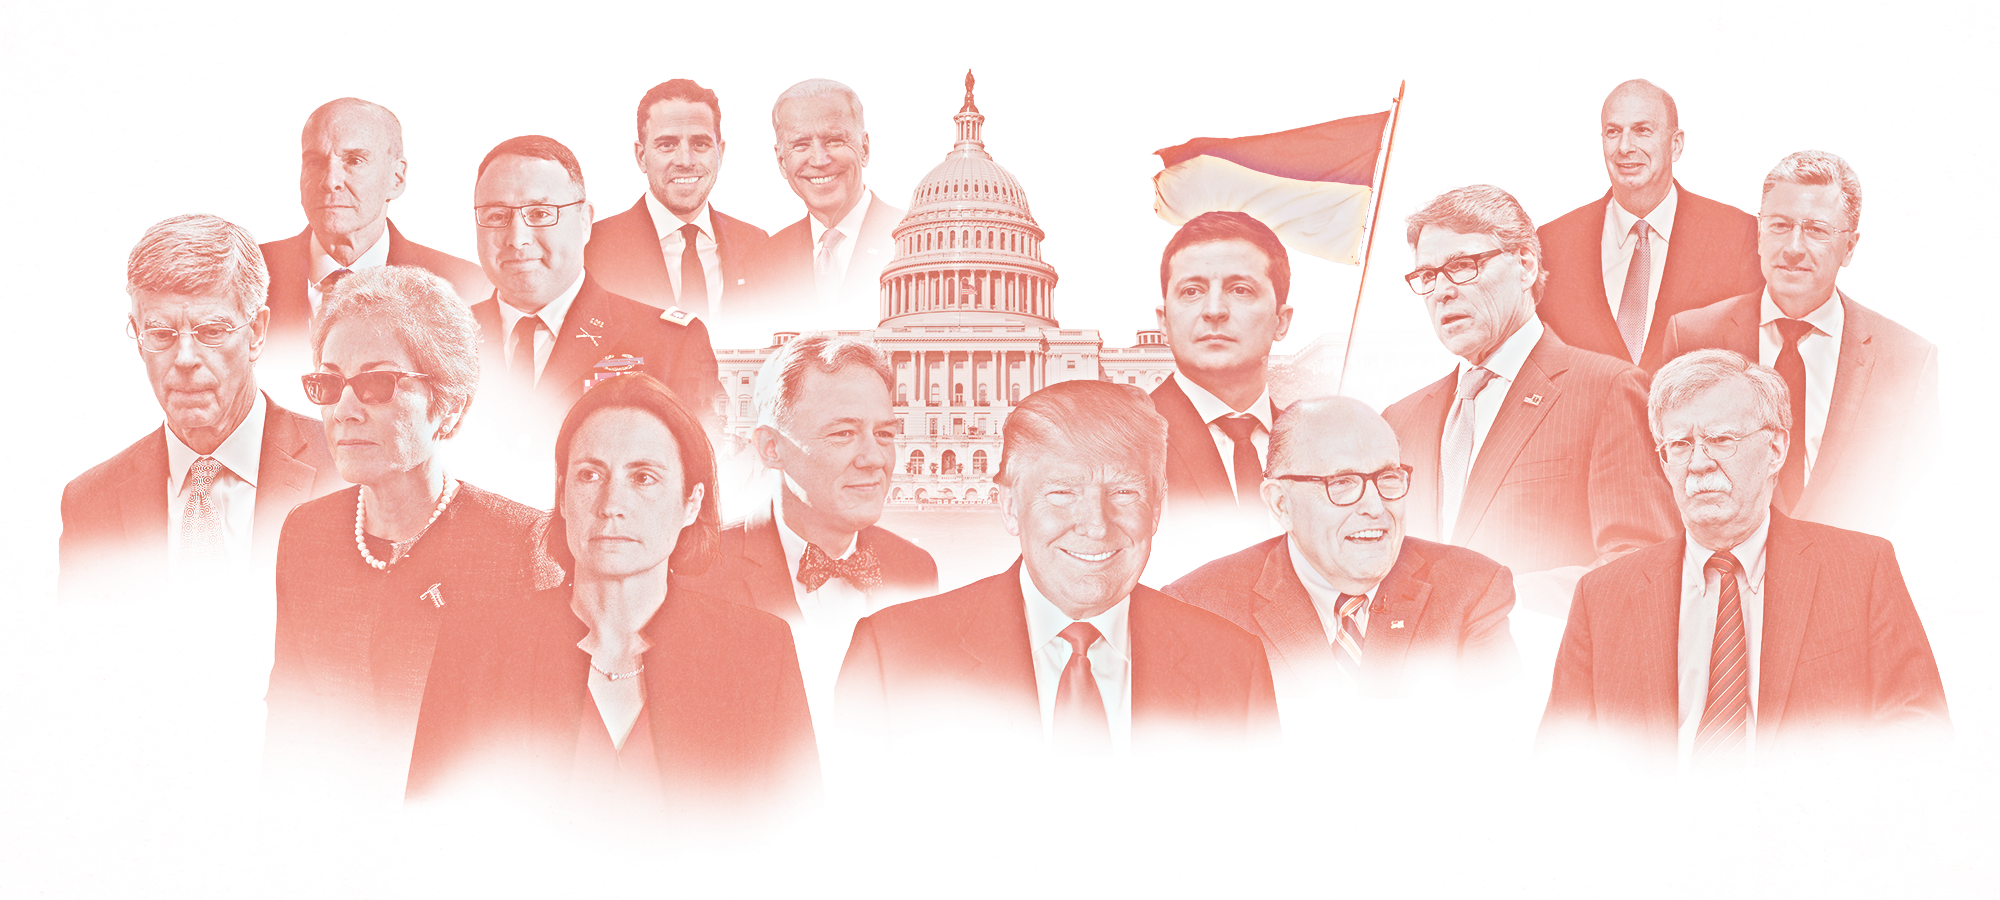

In [13]:
Image("photo.jpg")

### Extracting a list of article titles

In [14]:
url = "https://fivethirtyeight.com/features/"
r = requests.get(url)
soup = BeautifulSoup(r.content, "html.parser")

In [15]:
h2_list = soup.find_all(name="h2", attrs={"class": "article-title entry-title"})
h2_list

[<h2 class="article-title entry-title">
 <a href="https://fivethirtyeight.com/features/gun-sales-are-surging-but-background-checks-arent-keeping-up/" name="&amp;lpos=fivethirtyeightFeature&amp;lid=Feature1">
 				Gun Sales Are Surging, But Background Checks Aren’t Keeping Up			</a>
 </h2>,
 <h2 class="article-title entry-title">
 <a href="https://fivethirtyeight.com/videos/confidence-interval-will-biden-choose-kamala-harris-as-his-vp/" name="&amp;lpos=fivethirtyeightFeature&amp;lid=Feature2">
 				Confidence Interval: Will Biden Choose Kamala Harris As His VP?			</a>
 </h2>,
 <h2 class="article-title entry-title">
 <a href="https://fivethirtyeight.com/features/the-players-to-watch-on-the-nba-teams-just-trying-to-hang-around/" name="&amp;lpos=fivethirtyeightFeature&amp;lid=Feature3">
 				The Players To Watch On The NBA Teams Just Trying To Hang Around			</a>
 </h2>,
 <h2 class="article-title entry-title">
 <a href="https://fivethirtyeight.com/features/what-trump-could-learn-from-nascar

In [16]:
len(h2_list)

8

In [17]:
for element in h2_list:
    print(element.text.strip())

Gun Sales Are Surging, But Background Checks Aren’t Keeping Up
Confidence Interval: Will Biden Choose Kamala Harris As His VP?
The Players To Watch On The NBA Teams Just Trying To Hang Around
What Trump Could Learn From NASCAR
How The NHL’s New Format Changed The Stanley Cup Race
The Senate Has Always Favored Smaller States. It Just Didn’t Help Republicans Until Now.
How Biden’s VP Pick Could Shape Perceptions Of The Ticket Overall
Nomar Garciaparra’s Full Career Wasn’t Enough For Cooperstown — But It Was Still Damn Good


In [18]:
urls = ["https://fivethirtyeight.com/features/"]

for i in range(2, 101):     # The range(2, 101) generates a list of integers from 2 to 100.
    url = "https://fivethirtyeight.com/features/page/{}/".format(i)
    urls.append(url)

In [19]:
for url in urls:
    print(url)              # Do whatever you want with each web page.
    

https://fivethirtyeight.com/features/
https://fivethirtyeight.com/features/page/2/
https://fivethirtyeight.com/features/page/3/
https://fivethirtyeight.com/features/page/4/
https://fivethirtyeight.com/features/page/5/
https://fivethirtyeight.com/features/page/6/
https://fivethirtyeight.com/features/page/7/
https://fivethirtyeight.com/features/page/8/
https://fivethirtyeight.com/features/page/9/
https://fivethirtyeight.com/features/page/10/
https://fivethirtyeight.com/features/page/11/
https://fivethirtyeight.com/features/page/12/
https://fivethirtyeight.com/features/page/13/
https://fivethirtyeight.com/features/page/14/
https://fivethirtyeight.com/features/page/15/
https://fivethirtyeight.com/features/page/16/
https://fivethirtyeight.com/features/page/17/
https://fivethirtyeight.com/features/page/18/
https://fivethirtyeight.com/features/page/19/
https://fivethirtyeight.com/features/page/20/
https://fivethirtyeight.com/features/page/21/
https://fivethirtyeight.com/features/page/22/
http

### Writing & reading an HTML file

In [20]:
url = "https://fivethirtyeight.com/features/what-weve-already-learned-from-the-democrats-impeachment-witnesses/"
r = requests.get(url)

In [21]:
url[len("https://fivethirtyeight.com/features/"):-1]

'what-weve-already-learned-from-the-democrats-impeachment-witnesses'

In [22]:
file_name = url[len("https://fivethirtyeight.com/features/"):-1] + ".html"
file_name

'what-weve-already-learned-from-the-democrats-impeachment-witnesses.html'

In [23]:
with open(file_name, "w+b") as fw:
    fw.write(r.content)

In [24]:
with open(file_name, "r+b") as fr:
    soup = BeautifulSoup(fr.read(), "html.parser")
    
    print(soup.title.text) 

The Democrats’ Impeachment Witnesses | FiveThirtyEight


### Automating the process of saving all articles on the Features list

In [25]:
if not os.path.isdir("HTMLs"):
    os.mkdir("HTMLs")

In [26]:
for url in urls[:10]:
    print(url)
    
    ####################################################
    # Get the content of a page
    ####################################################
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    
    ####################################################
    # Get the list of articles
    ####################################################
    h2_list = soup.find_all(name="h2", attrs={"class": "article-title entry-title"})
    
    for h2 in h2_list:
        ####################################################
        # Find the anchor tag
        ####################################################
        a = h2.find("a")
        
        ####################################################
        # Extract the title & URL of an article
        ####################################################
        title = a.text
        article_url = a["href"]
        
        ####################################################
        # Fetch the content and save it as an HTML file
        ####################################################
        r2 = requests.get(article_url)
                
        file_name = article_url[len("https://fivethirtyeight.com/features/"):-1] + ".html"
        with open("HTMLs/" + file_name, "w+b") as f:
            f.write(r2.content)
        
        print("- " + file_name + " saved.")
        
        ####################################################
        # Sleep for a second
        ####################################################
        time.sleep(1)
    
    print()

https://fivethirtyeight.com/features/
- gun-sales-are-surging-but-background-checks-arent-keeping-up.html saved.
- nfidence-interval-will-biden-choose-kamala-harris-as-his-vp.html saved.
- the-players-to-watch-on-the-nba-teams-just-trying-to-hang-around.html saved.
- what-trump-could-learn-from-nascar.html saved.
- how-the-nhls-new-format-changed-the-stanley-cup-race.html saved.
- the-senate-has-always-favored-smaller-states-it-just-didnt-help-republicans-until-now.html saved.
- w-bidens-vp-pick-could-shape-perceptions-of-the-ticket-overall.html saved.
- nomar-garciaparras-full-career-wasnt-enough-for-cooperstown-but-it-was-still-damn-good.html saved.

https://fivethirtyeight.com/features/page/2/
- why-blaming-china-for-the-pandemic-probably-wont-help-trump-win.html saved.
- whos-who-in-the-nba-bubble-the-inner-circle-contenders.html saved.
- -you-buy-that-coronavirus-will-be-what-makes-or-breaks-trumps-re-election-prospects.html saved.
- why-florida-could-go-blue-in-2020.html saved.
-

### Extracting information from all HTML files & saving it in a CSV file

In [27]:
os.listdir("HTMLs")

['-interview-with-dr-anthony-fauci.html',
 '-you-buy-that-coronavirus-will-be-what-makes-or-breaks-trumps-re-election-prospects.html',
 '-you-buy-that-mail-in-voting-will-hurt-republicans.html',
 '-you-buy-that-masks-could-help-trump-politically.html',
 '-you-buy-that-voter-enthusiasm-will-help-trump-in-2020.html',
 '2020-could-be-the-new-year-of-the-woman-for-the-gop.html',
 'america-is-testing-for-covid-19-more-than-ever-and-it-still-isnt-enough.html',
 'americans-increasingly-dislike-how-republican-governors-are-handling-the-coronavirus-outbreak.html',
 'americans-support-voting-by-mail-but-not-all-of-them-want-to-or-can.html',
 'are-you-a-pinball-wizard.html',
 'barcelona-is-struggling-is-messi-part-of-the-problem-or-the-solution.html',
 'baseball-will-be-weird-this-year-but-the-astros-and-yankees-are-favorites-in-the-american-league-again.html',
 'bernie-williams-deserves-more-credit-for-making-the-yankees-a-dynasty.html',
 'bidens-polling-lead-is-big-and-steady.html',
 'bryson-de

In [30]:
# with open("metadata.csv", "w", encoding="utf8") as fw:
#     ####################################################
#     # Field names on the first row
#     ####################################################
#     fw.write("file_name\tarticle_title\tarticle_author\n")

#     for file_name in os.listdir("HTMLs"):
#         ####################################################
#         # Field values starting from the second row
#         ####################################################
#         with open("HTMLs/" + file_name, "r+b") as fr:
#             print(file_name)
#             soup = BeautifulSoup(fr.read(), "html.parser")
#             article_title = soup.find("h1", {"class": "article-title article-title-single entry-title"}).text.strip()
#             #article_author = soup.find("a", {"class": "author url fn"}).text
            
#             ####################################################
#             # Remove all possible tabs
#             ####################################################
#             article_title = article_title.replace("\t", "")
#             article_aurthor = article_author.replace("\t", "")
            
#             fw.write("{}\t{}\t{}\n".format(file_name, article_title, article_author))

In [31]:
with open("metadata.csv", "w", encoding="utf8") as fw:
    ####################################################
    # Field names on the first row
    ####################################################
    fw.write("file_name\tarticle_title\tarticle_author\n")

    for file_name in os.listdir("HTMLs"):
        ####################################################
        # Field values starting from the second row
        ####################################################
        with open("HTMLs/" + file_name, "r+b") as fr:
            print(file_name)
            soup = BeautifulSoup(fr.read(), "html.parser")
            article_title = soup.find("h1", {"class": "article-title article-title-single entry-title"}).text.strip()
            
            ####################################################
            # No author exception handling
            ####################################################
            if soup.find("a", {"class": "author url fn"}) is None:
                article_author = ""
            else:
                article_author = soup.find("a", {"class": "author url fn"}).text
            
            ####################################################
            # Remove all possible tabs
            ####################################################
            article_title = article_title.replace("\t", "")
            article_aurthor = article_author.replace("\t", "")
                        
            fw.write("{}\t{}\t{}\n".format(file_name, article_title, article_author))

-interview-with-dr-anthony-fauci.html
-you-buy-that-coronavirus-will-be-what-makes-or-breaks-trumps-re-election-prospects.html
-you-buy-that-mail-in-voting-will-hurt-republicans.html
-you-buy-that-masks-could-help-trump-politically.html
-you-buy-that-voter-enthusiasm-will-help-trump-in-2020.html
2020-could-be-the-new-year-of-the-woman-for-the-gop.html
america-is-testing-for-covid-19-more-than-ever-and-it-still-isnt-enough.html
americans-increasingly-dislike-how-republican-governors-are-handling-the-coronavirus-outbreak.html
americans-support-voting-by-mail-but-not-all-of-them-want-to-or-can.html
are-you-a-pinball-wizard.html
barcelona-is-struggling-is-messi-part-of-the-problem-or-the-solution.html
baseball-will-be-weird-this-year-but-the-astros-and-yankees-are-favorites-in-the-american-league-again.html
bernie-williams-deserves-more-credit-for-making-the-yankees-a-dynasty.html
bidens-polling-lead-is-big-and-steady.html
bryson-dechambeaus-power-boost-is-off-the-charts.html
can-the-hare-